In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
x = np.genfromtxt(r'Data_HW_2.txt')
XS = np.shape(x)
N = XS[0]

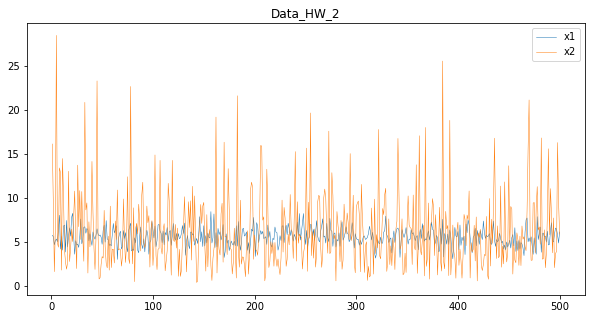

In [20]:
edgemx = 200
index = list(range(1, N+1))
s = np.zeros((7, 2))
fig = plt.figure(figsize=(10, 5))
plt.plot(index, x[:,0], label='x1', lw=0.5)
plt.plot(index, x[:,1], label='x2', lw=0.5)
plt.title('Data_HW_2')
plt.legend()
plt.show()

In [4]:
s[0,:] = np.mean(x, axis=0)
s[1,:] = np.median(x, axis=0)
s[2,:] = st.mode(x, axis=0)[0]
s[3,:] = np.std(x, axis=0, ddof=1)  # ddof=1 conforms with Matlab (divide by N-1)
s[4,:] = st.skew(x, axis=0)
s[5,:] = st.kurtosis(x, axis=0, fisher=False)  # fisher=False conforms with Matlab
s[6,:] = s[5, :]/s[3, :]**4

FormatSpec = 'mean=%4.2f, median=%4.2f, mode=%4.2f, std=%4.2f, \
              skew=%4.2f, kurtosis=%4.2f, CoefKurt=%4.2f'
for i in range(np.shape(s)[1]):
    print(FormatSpec % tuple(s[:, i]))

mean=5.57, median=5.56, mode=5.13, std=1.00,               skew=0.13, kurtosis=2.98, CoefKurt=2.95
mean=6.17, median=5.20, mode=0.38, std=4.36,               skew=1.53, kurtosis=6.19, CoefKurt=0.02


In [5]:
def fitdist_norm(x):
    # This definition conforms to Matlab's.
    # scipy.stats.norm.fit(x) divides by N, not N-1
    # Still use scipy.stats.norm.fit(x) so that scipy.stats.norm.pdf() works
    mu = np.mean(x)
    sumn = 0
    for xn in x:
        sumn += (xn - mu)**2
    sigma = np.sqrt(sumn/(len(x)-1))
    return mu, sigma

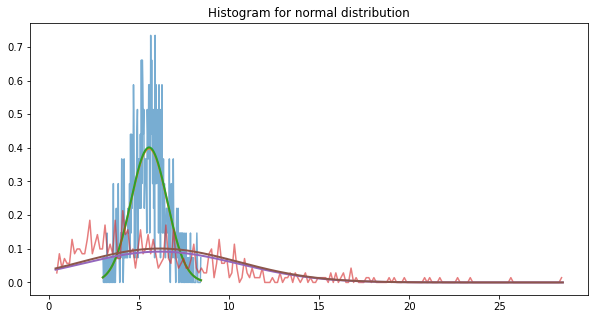

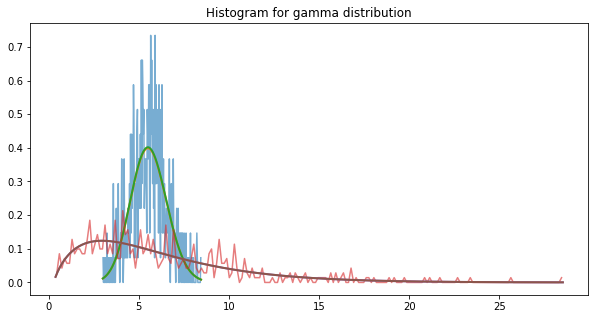

In [19]:
dists = ['normal', 'gamma']
for distrib in dists:
    fig = plt.figure(figsize=(10, 5))
    for nn in range(np.shape(x)[1]):
        xx = x[:, nn]
        if distrib == 'normal':
            pdca = list(st.norm.fit(xx)) # almost matches matlab
        elif distrib == 'gamma':
            pdca = list(st.gamma.fit(xx)) # doesn't match matlab, works internally
        scale = pdca.pop()  # sigma for normal, 1/b for gamma?
        loc = pdca.pop()  # mu for normal, ? for gamma
        mles = pdca  # empty for normal, a for gamma?
        #print(scale, loc, mles)
        minx = min(xx)
        maxx = max(xx)
        inds = np.linspace(minx, maxx, 500)
        NN, edges = np.histogram(xx, edgemx)
        if distrib == 'normal':
            pdf_theory = st.norm.pdf(inds, loc=loc, scale=scale)
        elif distrib == 'gamma':
            pdf_theory = st.gamma.pdf(inds, a=mles[0], loc=loc, scale=scale)
        dxt = inds[1] - inds[0]
        pdf_theory_n = pdf_theory/(sum(pdf_theory)*dxt)
        centers = 0.5*(edges[0:-1] + edges[1:len(edges)])
        dxd = centers[1] - centers[0]
        pdfsamp = NN/(sum(NN)*dxd)
        plt.plot(centers, pdfsamp, alpha=0.6)
        plt.plot(inds, pdf_theory, lw=2)
        plt.plot(inds, pdf_theory_n, lw=2)
    plt.title(f'Histogram for {distrib} distribution')
    plt.show()

# Rank Sum and t Test Statistics